<a href="https://colab.research.google.com/github/nandakhairunnisa/UAS_DataMining/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Membaca data dari file Excel
df = pd.read_excel('harga emas antam 2018-2023.xlsx')
df

,date,Harga Emas Antam per Gram
0,2022-12-04,998000
1,2022-12-05,999000
2,2022-12-06,984000
3,2022-12-07,984000
4,2022-12-08,999000
...,...,...
139,2023-04-29,1056000
140,2023-05-01,1054000
141,2023-05-02,1053000
142,2023-05-03,1062000


In [3]:
# Mengonversi kolom tanggal ke format yang sesuai (opsional)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
# Mengubah kolom tanggal menjadi variabel numerik (jumlah hari sejak tanggal awal)
df['Hari'] = (df['date'] - df['date'].min()).dt.days
df

,date,Harga Emas Antam per Gram,Hari
0,2022-12-04,998000,0
1,2022-12-05,999000,1
2,2022-12-06,984000,2
3,2022-12-07,984000,3
4,2022-12-08,999000,4
...,...,...,...
139,2023-04-29,1056000,146
140,2023-05-01,1054000,148
141,2023-05-02,1053000,149
142,2023-05-03,1062000,150


In [5]:
# Memisahkan variabel independen (Hari) dan dependen (Nilai)
X = df[['Hari']].values
y = df['Harga Emas Antam per Gram'].values

In [6]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [7]:
# Mengaktifkan package dan sintax untuk mengubah skala data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Mengaktifkan packages untuk klasifikasi KNN dengan menginput packages packages KNN
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# Mengaktifkan fungsi klasifikasi untuk KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [10]:
# Memasukkan data training pada fungsi klasifikasi untuk KNN
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto',
                     leaf_size=30,
                     metric='minkowski',
                     metric_params=None,
                     n_jobs=1,
                     n_neighbors=5,
                     p=2,
                     weights='uniform')

KNeighborsClassifier(n_jobs=1)

In [11]:
y_pred = knn.predict(X_test)
y_pred

array([1012000, 1067000, 1029000, 1084000, 1074000, 1077000, 1015000,
       1000000, 1019000, 1054000, 1054000, 1035000, 1014000, 1054000,
       1014000, 1004000, 1043000, 1022000, 1024000, 1026000, 1012000,
       1035000,  984000, 1014000,  998000, 1026000, 1072000, 1014000,
       1049000])

In [12]:
# Menentukan prediksi
knn.predict_proba(X_test)

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.2, 0.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [13]:
# Import package untuk melihat ke akuratan data prediksi dengan data aktuan
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
# Menampilkan matriks hasil prediksi
print(confusion_matrix(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# Contoh data prediksi dan data aktual (harap ganti dengan data Anda)
y_pred_reg = y_pred
y_test_reg = y_test

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

# Menghitung RMS (Root Mean Square)
rms = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

# Menghitung ME (Mean Error)
me = mean_absolute_error(y_test_reg, y_pred_reg)

print("MAPE :", mape)
print("RMS  :", rms)
print("ME   :", me)


MAPE : 0.006252402628310701
RMS  : 8940.415789143066
ME   : 6482.758620689655


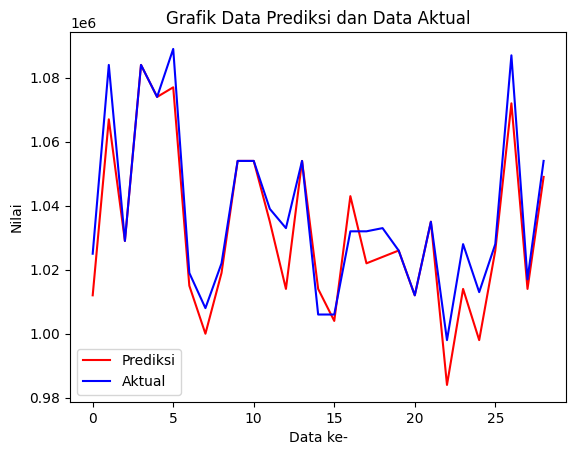

In [16]:
# Membuat plot untuk data prediksi (y_pred_reg) dengan garis berwarna merah
plt.plot(y_pred_reg, label='Prediksi', color='red')

# Membuat plot untuk data aktual (y_test_reg) dengan garis berwarna biru
plt.plot(y_test_reg, label='Aktual', color='blue')

# Menambahkan label sumbu x dan y
plt.xlabel('Data ke-')
plt.ylabel('Nilai')

# Menambahkan judul grafik
plt.title('Grafik Data Prediksi dan Data Aktual')

# Menampilkan legenda
plt.legend()

# Menampilkan grafik
plt.show()
